In [ ]:

import requests

# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'secret'
auth = requests.auth.HTTPBasicAuth('TZJY-Nd0GixWGw', 'aWCsciGI-It3auNnRpE7rMrcNTq_CQ')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'rmj1992',
        'password': 'SuperCoolNewBike'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'RMJ.0'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

import praw
reddit = praw.Reddit(client_id='TZJY-Nd0GixWGw',
                     client_secret='aWCsciGI-It3auNnRpE7rMrcNTq_CQ',
                     user_agent='RMJ.0',
                     username='rmj1992',
                     password='SuperCoolNewBike')

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime

# Pull the top 1000 posts of the last month

import pandas as pd
from datetime import datetime as dt

# we use this function to convert responses to dataframes
def df_from_response(res):
    # initialize temp dataframe for batch of data in response
    df = pd.DataFrame()

    # loop through each post pulled from res and append to df
    for post in res.json()['data']['children']:
        df = df.append({
            'author': post['data']['author'],
            'title': post['data']['title'],
            'selftext': post['data']['selftext'],
            'upvote_ratio': post['data']['upvote_ratio'],
            'subreddit': post['data']['subreddit'],
            'score': post['data']['score'],
            'num_comments': post['data']['num_comments'],
            'link_flair_css_class': post['data']['link_flair_css_class'],
            'created_utc': dt.fromtimestamp(post['data']['created_utc']).strftime('%Y-%m-%dT%H:%M:%SZ'),
            'id': post['data']['id'],
            'kind': post['kind'],
            'url' : post['data']['url']
        }, ignore_index=True)
      
    return df

# initialize dataframe and parameters for pulling data in loop
data = pd.DataFrame()
params = {'limit': 100}

# loop through 10 times (returning 1K posts)
for i in range(10):
    # make request
    res = requests.get("https://oauth.reddit.com/r/marvelstudios/top/?t=month",
                       headers=headers,
                       params=params)

    # get dataframe from response
    new_df = df_from_response(res)
    # take the final row (oldest entry)
    row = new_df.iloc[len(new_df)-1]
    # create fullname
    fullname = row['kind'] + '_' + row['id']
    # add/update fullname in params
    params['after'] = fullname
    
    # append new_df to data
    data = data.append(new_df, ignore_index=True)
    

In [ ]:
data

,author,created_utc,id,kind,link_flair_css_class,num_comments,score,selftext,subreddit,title,upvote_ratio,url
0,Minifig81,2021-03-25T14:16:11Z,md4nye,t3,Gr,805.0,56313.0,,marvelstudios,If WandaVision was a Disney Cartoon instead...,0.86,https://i.imgur.com/zFlSstY.jpg
1,LazyKerosene,2021-03-22T09:22:11Z,manfwl,t3,Bl,1010.0,49457.0,,marvelstudios,This is heartwarming,0.86,https://i.redd.it/4n2vj4r1zko61.jpg
2,cchrisssss,2021-04-06T17:57:41Z,mln0ce,t3,O,858.0,48993.0,,marvelstudios,This scene always gets me. Lost my Dad to canc...,0.89,https://i.redd.it/5lyr0y6okmr61.jpg
3,Lawrence-Ward,2021-04-07T05:43:26Z,mlyi9s,t3,B,928.0,48079.0,,marvelstudios,This scene hits different when you know that T...,0.90,https://i.redd.it/l07mtabl2qr61.jpg
4,harushiga,2021-04-05T09:00:30Z,mkk4oj,t3,LO,3783.0,46584.0,,marvelstudios,Marvel Studios' Loki | Official Trailer | Disney+,0.90,https://www.youtube.com/watch?v=nW948Va-l10
...,...,...,...,...,...,...,...,...,...,...,...,...
994,sweatyarmadillo,2021-03-16T00:34:19Z,m611o4,t3,Gr,5.0,85.0,,marvelstudios,"I present ""The Kill Box"" - a diorama base I ma...",0.96,https://www.reddit.com/gallery/m611o4
995,IAmDrewbacca,2021-04-08T14:46:47Z,mmyjuu,t3,B,26.0,83.0,,marvelstudios,I wish we got more Ty Burrell as Doc Samson. I...,0.94,https://i.redd.it/c57dk5kgwzr61.jpg
996,LogicDog,2021-04-07T11:32:57Z,mm4qrg,t3,Gr,20.0,85.0,,marvelstudios,"Hey Sam, put a helmet on! Sheesh.",0.92,https://i.redd.it/p3o205mysrr61.png
997,Btwells1,2021-03-30T18:38:22Z,mgrwix,t3,Pnk,12.0,86.0,,marvelstudios,"Sorry Thor &amp; Banner, Groot is the stronges...",0.93,https://www.reddit.com/gallery/mgrwix


In [ ]:
popular = data[data.duplicated(['author'], keep = False)] # Users with more than one comment in top 1000

In [ ]:
popular = popular[popular['author'] != '[deleted]'] # Remove deleted users (their names show as '[deleted]')

In [ ]:
popular

,author,created_utc,id,kind,link_flair_css_class,num_comments,score,selftext,subreddit,title,upvote_ratio,url
1,LazyKerosene,2021-03-22T09:22:11Z,manfwl,t3,Bl,1010.0,49457.0,,marvelstudios,This is heartwarming,0.86,https://i.redd.it/4n2vj4r1zko61.jpg
3,Lawrence-Ward,2021-04-07T05:43:26Z,mlyi9s,t3,B,928.0,48079.0,,marvelstudios,This scene hits different when you know that T...,0.90,https://i.redd.it/l07mtabl2qr61.jpg
4,harushiga,2021-04-05T09:00:30Z,mkk4oj,t3,LO,3783.0,46584.0,,marvelstudios,Marvel Studios' Loki | Official Trailer | Disney+,0.90,https://www.youtube.com/watch?v=nW948Va-l10
5,JackFisherBooks,2021-04-01T06:33:53Z,mhsgry,t3,G,674.0,44776.0,,marvelstudios,Kathryn Hahn Says Her Kids Were 'Suspiciously ...,0.93,https://www.yahoo.com/entertainment/kathryn-ha...
7,wandavisionbaby,2021-04-05T19:57:19Z,mkyguv,t3,DO,1086.0,40124.0,,marvelstudios,Wanda really needs to work on her reflexes,0.93,https://v.redd.it/17f5wkry0gr61
...,...,...,...,...,...,...,...,...,...,...,...,...
979,CeSiteEstDesOrdures,2021-04-11T22:28:55Z,mp5008,t3,DGr,44.0,87.0,&gt;**No.** I can say. That is not going to ha...,marvelstudios,Black Panther 2 Producer Comments On The Possi...,0.95,https://www.reddit.com/r/marvelstudios/comment...
980,LittleYellowFish1,2021-04-08T21:45:02Z,mn6tqg,t3,Gr,1.0,90.0,,marvelstudios,Thunderbolts - Concept Logo (OC),0.94,https://i.redd.it/o6l3u7v2z1s61.jpg
988,Dogax2012,2021-04-12T23:14:31Z,mptxz3,t3,Gr,6.0,88.0,,marvelstudios,I redid cover of Cap # 149 (1972) ( art by Gil...,0.96,https://www.reddit.com/gallery/mptxz3
989,miwa606,2021-04-05T07:14:40Z,mki7xd,t3,Gr,1.0,85.0,,marvelstudios,2nd batch of Wanda's WandaVision outfits!,0.92,https://i.redd.it/dx156v109cr61.png


In [ ]:
popular.author.nunique()

116

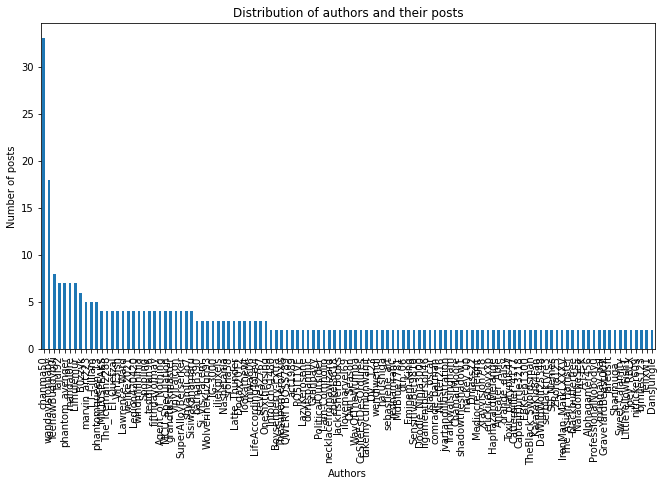

In [ ]:
# See the distrubution of authors and their posts
plt.figure(figsize=[11,6])
ax = popular.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts') 
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
# Create a DataFrame called 'influencers', authors who have 3 or more top posts. This is to lower the sample size.

post_count = popular['author'].value_counts()
popular = popular.merge(post_count.to_frame(),
                                left_on='author',
                                right_index=True)

popular.rename(columns={'author_y':'post_count'}, inplace=True)
popular = popular.loc[:,~popular.columns.duplicated()]
del popular['author_x']

influencers = popular[popular.post_count > 2].sort_values(by=['score'], ascending=False)
influencers

,author,created_utc,id,kind,link_flair_css_class,num_comments,score,selftext,subreddit,title,upvote_ratio,url,post_count
3,Lawrence-Ward,2021-04-07T05:43:26Z,mlyi9s,t3,B,928.0,48079.0,,marvelstudios,This scene hits different when you know that T...,0.90,https://i.redd.it/l07mtabl2qr61.jpg,4
7,wandavisionbaby,2021-04-05T19:57:19Z,mkyguv,t3,DO,1086.0,40124.0,,marvelstudios,Wanda really needs to work on her reflexes,0.93,https://v.redd.it/17f5wkry0gr61,18
10,Limulemur,2021-03-29T12:43:46Z,mftomj,t3,B,1580.0,35898.0,,marvelstudios,Creepy. Obsessed. Wicked. David Tennant as Kil...,0.91,https://i.redd.it/rik95m9exzp61.jpg,7
12,shyamli_oo7,2021-03-30T12:50:34Z,mgkf24,t3,Gr,592.0,34763.0,,marvelstudios,Great...! Now I'm Sad,0.92,https://i.redd.it/hu4eeaji37q61.jpg,4
13,steve32767,2021-04-09T12:23:42Z,mnkwcs,t3,LO,407.0,33534.0,,marvelstudios,LOKI Covers for EMPIRE Magazine,0.92,https://i.redd.it/3temy8rqb6s61.jpg,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,lookatnewt,2021-04-03T09:04:14Z,mj83uh,t3,Gr,13.0,94.0,,marvelstudios,"I did a digital painting on Wandavision, thoug...",0.84,https://i.redd.it/8u9ngrt7iyq61.png,3
958,Si_Vis_Pacem-,2021-04-07T01:49:45Z,mlvf4j,t3,B,41.0,91.0,,marvelstudios,Anyone else want Falcon to get his guns back? ...,0.92,https://i.redd.it/a8k3s55wwor61.png,3
978,windmillninja,2021-04-13T16:47:40Z,mqb86j,t3,B,41.0,88.0,,marvelstudios,TIL Rage Against the Machine/Audioslave guitar...,0.91,https://www.reddit.com/gallery/mqb86j,4
988,Dogax2012,2021-04-12T23:14:31Z,mptxz3,t3,Gr,6.0,88.0,,marvelstudios,I redid cover of Cap # 149 (1972) ( art by Gil...,0.96,https://www.reddit.com/gallery/mptxz3,3


In [ ]:
influencers.author.nunique()

43

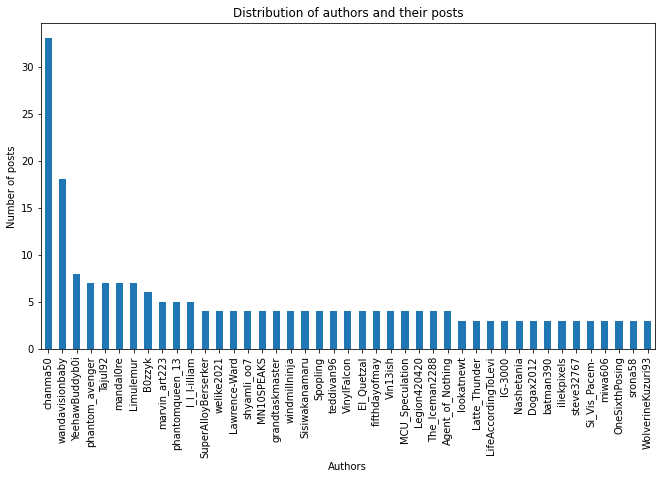

In [ ]:
# See the distrubution of influencers and their posts
plt.figure(figsize=[11,6])
ax = influencers.author.value_counts().plot(kind='bar',title='Distribution of authors and their posts') 
ax.set(xlabel="Authors", ylabel="Number of posts")
plt.savefig("Bargraph",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
# Create list of influencers
u_authors = list(influencers.author.unique())
u_authors

['Lawrence-Ward',
 'wandavisionbaby',
 'Limulemur',
 'shyamli_oo7',
 'steve32767',
 'chanma50',
 'grandtaskmaster',
 'SuperAlloyBerserker',
 'teddivan96',
 'fifthdayofmay',
 'Legion420420',
 'WolverineKuzuri93',
 'El_Quetzal',
 'Agent_of_Nothing',
 'iliekpixels',
 'mandal0re',
 'Nashetania',
 'B0zzyk',
 'windmillninja',
 'phantom_avenger',
 'MN10SPEAKS',
 'l_l_l-illiam',
 'YeehawBuddyb0i',
 'IG-3000',
 'phantomqueen_13',
 'Spopling',
 'VinylFalcon',
 'Tajul92',
 'Si_Vis_Pacem-',
 'srona58',
 'batman390',
 'lookatnewt',
 'welike2021',
 'The_Iceman2288',
 'miwa606',
 'OneSixthPosing',
 'Latte_Thunder',
 'Dogax2012',
 'Sisiwakanamaru',
 'marvin_art223',
 'MCU_Speculation',
 'Vin13ish',
 'LifeAccordingToLevi']

In [ ]:
# Function to extract user posts with PRAW

def get_user_posts(author, n):
    
    redditor = reddit.redditor(author)
    user_posts_list = []
    
    for submission in redditor.submissions.top(limit = n):
        info_list = []
        info_list.append(str(submission.author))
        info_list.append(str(submission.subreddit))
        info_list.append(submission.title)
        info_list.append(submission.selftext)
        info_list.append(submission.upvote_ratio)
        info_list.append(submission.score)
        info_list.append(submission.num_comments)
        info_list.append(submission.id)
        
        
        user_posts_list.append(info_list)
    
    a = sorted(user_posts_list, key=lambda x: x[1], reverse = True)
    user_posts_df = pd.DataFrame(a)
    return user_posts_df

In [ ]:
# Retrieves 10 top posts for every influencer in any subreddit

authors_df =  pd.DataFrame() 
authors_df = authors_df.fillna(0)
for u in u_authors:
    c = get_user_posts(u, 10)
    authors_df = pd.concat([authors_df, c])

In [ ]:
authors_df = authors_df.rename(index=str, #renaming column names 
                               columns={0: "author", 1: "subreddit", 2: "title", 3: "selftext", 4: "upvote_ratio",
                                        5: "score", 6: "num_comments", 7: "id"})
authors_df

,author,subreddit,title,selftext,upvote_ratio,score,num_comments,id
0,Lawrence-Ward,ufc,Ngannou doesn’t care for your “techniques”,,0.99,3949,199,m8epsz
1,Lawrence-Ward,ufc,Poirier on his 3rd email,,0.97,838,27,mpdnhu
2,Lawrence-Ward,mmamemes,Ngannou doesn’t care for your “techniques”,,0.99,1557,59,m8eq4a
3,Lawrence-Ward,marvelstudios,This scene hits different when you know that T...,,0.90,48084,928,mlyi9s
4,Lawrence-Ward,marvelstudios,Cap gets a lot of stick for trying to choke Ul...,,0.98,7734,210,mmdo5k
...,...,...,...,...,...,...,...,...
5,LifeAccordingToLevi,marvelstudios,This marks the end of my MCU journey. After wa...,,0.91,174,79,mi1x22
6,LifeAccordingToLevi,marvelstudios,I just watched Captain Marvel for the first ti...,,0.85,163,99,mf3p7d
7,LifeAccordingToLevi,marvelstudios,"I just finished watching Ant-Man, and was hopi...",,0.92,158,48,l2y323
8,LifeAccordingToLevi,cakedecorating,"I know it’s not impressive, but I tried to mak...",,0.99,144,10,gdcdcb


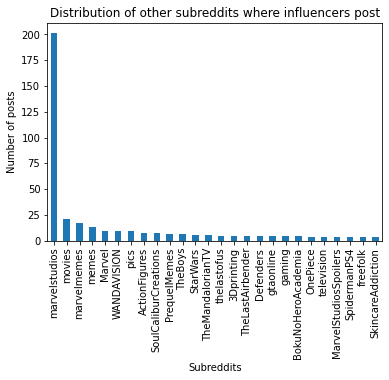

In [ ]:
counts = authors_df['subreddit'].value_counts() 
# Only plot the subreddits that appear more than twice
ax = authors_df[authors_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of other subreddits where influencers post') 
ax.set(xlabel="Subreddits", ylabel="Number of posts")
plt.savefig("BargraphSubreddits",dpi=150, bbox_inches='tight',pad_inches=0.5)

In [ ]:
n_df = authors_df[['author', 'subreddit']] # Create a dataframe for network graph purposes 
# n_df.to_csv('put filepath here', index = False)  ***if you want to create csv for Gephi
subs = list(n_df.subreddit.unique()) # Make list of unique subreddits to use in network graph

In [ ]:
subs

['ufc',
 'mmamemes',
 'marvelstudios',
 'marvelmemes',
 'Marvel',
 'MovieDetails',
 'powerrangers',
 'polls',
 'MarvelCringe',
 'Defenders',
 'riverdale',
 'movies',
 'shield',
 'memes',
 'WANDAVISION',
 'UmbrellaAcademy',
 'SkincareAddiction',
 'television',
 'gaming',
 'freefolk',
 'StarWars',
 'TheBoys',
 'saltierthancrait',
 'PrequelMemes',
 'PS4',
 'PlayAvengers',
 'HAWKEYE',
 'pics',
 'gameofthrones',
 'TheLastAirbender',
 'BokuNoHeroAcademia',
 'TheMandalorianTV',
 'gtaonline',
 'RedDeadOnline',
 'Jokes',
 'DunderMifflin',
 'thelastofus',
 'BoJackHorseman',
 'capsulewardrobe',
 'Wrasslin',
 'UnethicalLifeProTips',
 'legendofkorra',
 'interestingasfuck',
 'Choices',
 'zelda',
 'pokemon',
 'LifeProTips',
 'tolkienfans',
 'thegrandtour',
 'nonononoyes',
 'lego',
 'harrypotter',
 'aww',
 'OTMemes',
 'pittsburgh',
 'cosplay',
 '3Dprinting',
 'cyberpunkgame',
 'SpidermanPS4',
 'drawing',
 'LaCasaDePapel',
 'MarvelStudiosSpoilers',
 'todayilearned',
 'politics',
 'books',
 'OnePiece',


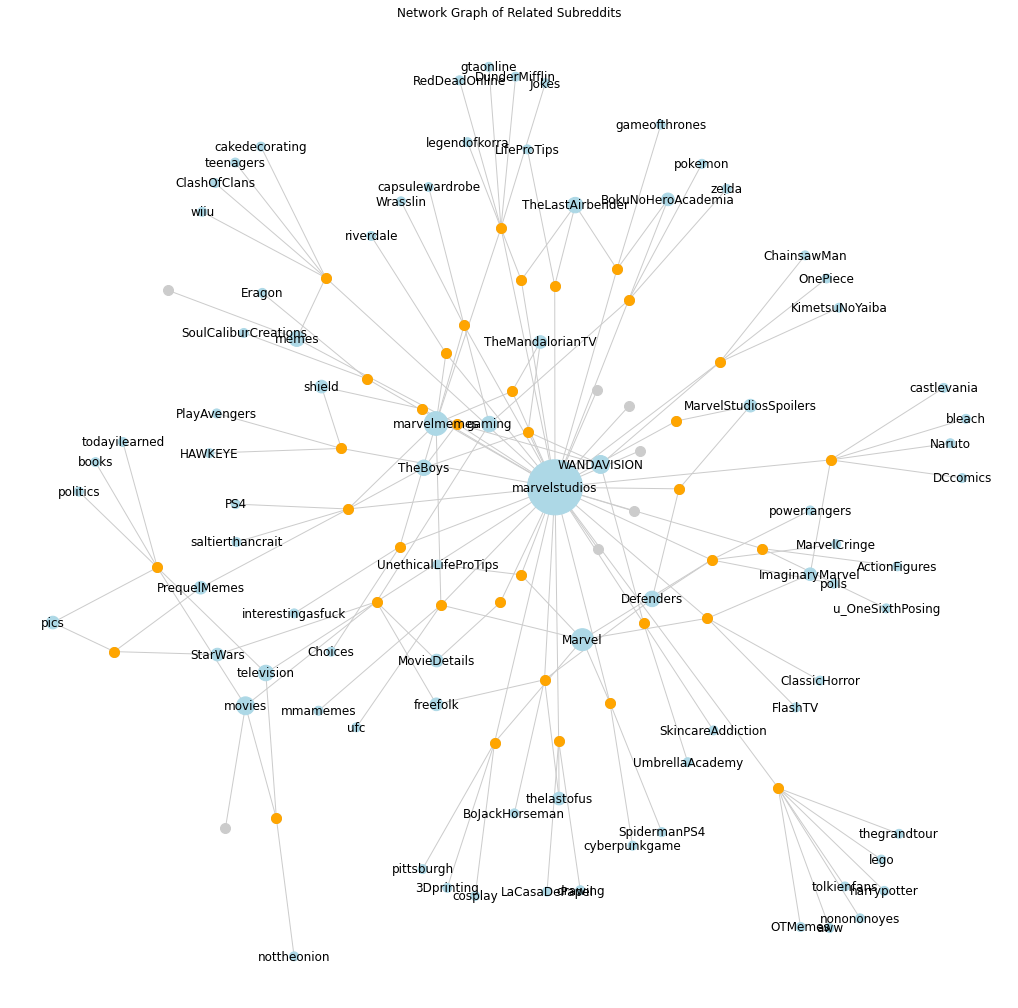

In [ ]:
plt.figure(figsize=(18, 18))

# Create the graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit') 

# Create a layout
layout = nx.spring_layout(g,iterations=50,scale=2)

# Influencers are grey nodes. Influencers with a higher degree are orange nodes.
# Subreddits are blue nodes and sized according to their degree.
# Only subreddits are labeled.


# Go through every subbreddit, ask the graph how many connections it has. 
# Multiply that by 80 to get the circle size
sub_size = [g.degree(sub) * 80 for sub in subs]
nx.draw_networkx_nodes(g, 
                       layout, 
                       nodelist=subs, 
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# Draw nodes
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

# Draw edges
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

#Label subreddits
node_labels = dict(zip(subs, subs))
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [ ]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 127
Number of edges: 161
Average degree:   2.5354
